In [ ]:
# Exercise 2: Analyzing network properties

In [1]:
# Load relevant libraries
# Extensive documentation for iGraph here: http://igraph.org/r/doc/
suppressMessages(library(igraph))

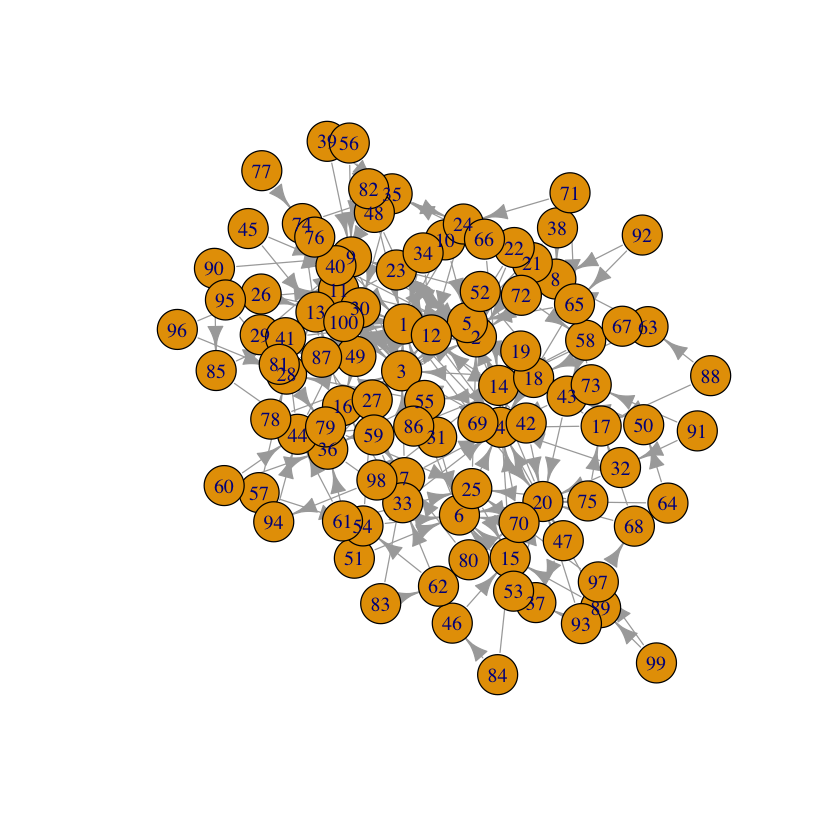

In [5]:
# Create a network to analyze
# We will discuss the barabasi.game command in more detail later
test.graph <-barabasi.game(100,power=0.5,m=2)
plot.igraph(test.graph)

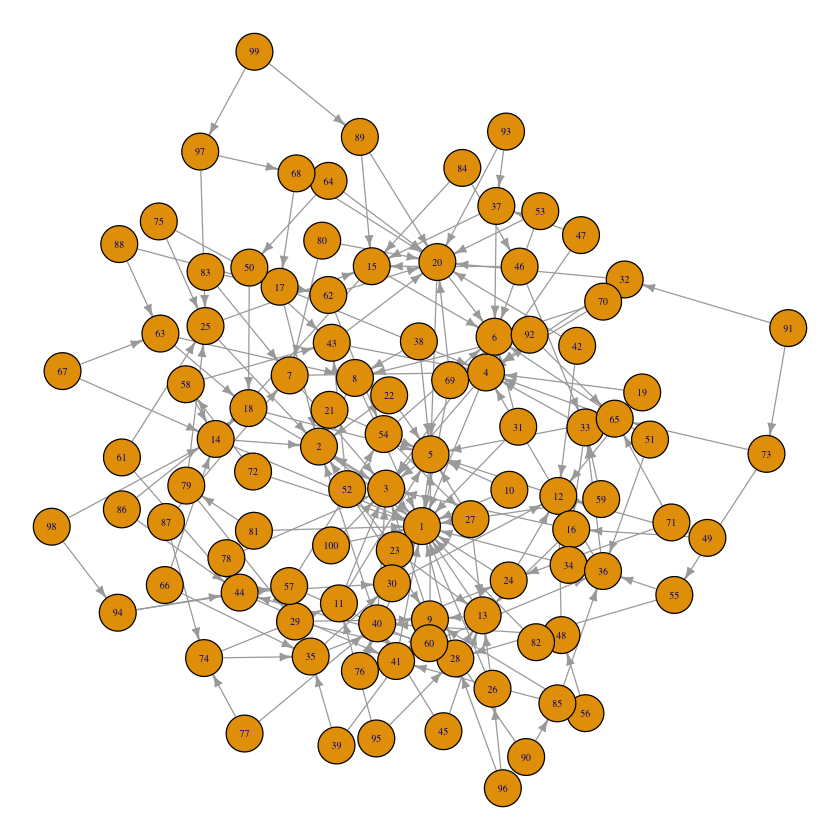

In [6]:
# Plot using a layout algorithm and setting parameters to make the 
# network easier to look at
par(mar=c(.1,.1,.1,.1)) # Reduce margins around plot
plot.igraph(test.graph, layout=layout.fruchterman.reingold,
vertex.size=10,         # sets size of the vertex, default is 15
vertex.label.cex=.5,    # size of the vertex label
edge.arrow.size=.5        # sets size of the arrow at the end of the edge
)

In [7]:
# Overview of the graph
# How large is the network? (This was set when we made the network, but what if it hadn't been?)
 
test.graph      # Returns that it is an IGRAPH object with 100 nodes and 197 links,
                # made with the Barabasi algorithm with parameter settings
                # as well as the edge list up to a certain count
V(test.graph)   # gives the vertex sequence
E(test.graph)   # gives the edge sequence (edge list)

IGRAPH 4cf7969 D--- 100 197 -- Barabasi graph
+ attr: name (g/c), power (g/n), m (g/n), zero.appeal (g/n), algorithm
| (g/c)
+ edges from 4cf7969:
 [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 3  5-> 3  5-> 1  6-> 3  6-> 4  7-> 3
[11]  7-> 4  8-> 1  8-> 2  9-> 3  9-> 5 10-> 5 10-> 1 11-> 5 11-> 3 12-> 4
[21] 12-> 5 13-> 1 13-> 9 14-> 1 14-> 2 15-> 6 15->14 16-> 3 16->13 17-> 4
[31] 17-> 2 18-> 5 18-> 3 19-> 4 19->12 20-> 6 20-> 5 21-> 5 21-> 2 22-> 5
[41] 22-> 2 23-> 2 23->13 24->12 24-> 1 25-> 2 25->15 26->13 26-> 1 27->13
[51] 27-> 5 28->13 28-> 1 29->28 29-> 9 30->12 30-> 1 31-> 6 31-> 1 32-> 4
[61] 32->20 33->16 33-> 4 34->12 34-> 1 35->24 35->30 36->33 36->12 37-> 6
+ ... omitted several edges

+ 100/100 vertices, from 4cf7969:
  [1]   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
 [19]  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
 [37]  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
 [55]  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
 [73]  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
 [91]  91  92  93  94  95  96  97  98  99 100

+ 197/197 edges from 4cf7969:
  [1]  2-> 1  3-> 1  3-> 2  4-> 1  4-> 3  5-> 3  5-> 1  6-> 3  6-> 4  7-> 3
 [11]  7-> 4  8-> 1  8-> 2  9-> 3  9-> 5 10-> 5 10-> 1 11-> 5 11-> 3 12-> 4
 [21] 12-> 5 13-> 1 13-> 9 14-> 1 14-> 2 15-> 6 15->14 16-> 3 16->13 17-> 4
 [31] 17-> 2 18-> 5 18-> 3 19-> 4 19->12 20-> 6 20-> 5 21-> 5 21-> 2 22-> 5
 [41] 22-> 2 23-> 2 23->13 24->12 24-> 1 25-> 2 25->15 26->13 26-> 1 27->13
 [51] 27-> 5 28->13 28-> 1 29->28 29-> 9 30->12 30-> 1 31-> 6 31-> 1 32-> 4
 [61] 32->20 33->16 33-> 4 34->12 34-> 1 35->24 35->30 36->33 36->12 37-> 6
 [71] 37->15 38-> 5 38-> 8 39->35 39-> 9 40-> 3 40-> 2 41-> 1 41->40 42->12
 [81] 42->20 43->20 43-> 4 44->41 44->30 45->40 45->13 46->15 46->33 47-> 4
 [91] 47->37 48->40 48->12 49->16 49->12 50->43 50->18 51-> 6 51->36 52-> 9
+ ... omitted several edges

In [8]:
# Graph properties

# The "GenInd()" function from the NetIndices package takes an adjacency matrix as input
# and returns 10 global properties of the graph
library(NetIndices)

test.graph.adj<-get.adjacency(test.graph,sparse=F)
# in older versions of igraph the default was sparse=F,
# but now you must specify, other wise you get a matrix of 1s and .s
 
test.graph.properties<-GenInd(test.graph.adj)
 
# The function output consists of 10 network properties.
# Five of them are evaluated here:
 
test.graph.properties$N            #number of nodes
 
test.graph.properties$Ltot        #number of links
 
test.graph.properties$LD        #link density (average # of links per node)
 
test.graph.properties$C            #the connectance of the graph
# Connectance is a measure of completeness of a graph, comparing the
# number of observed edges to the number of possible edges
# This function measures connectance as L/(N*(N-1)) where L is links (edges), and N is nodes
# Connectance can also be calculated as L/(N^2)

str(test.graph.properties) # See how GenInd outputs are encoded
names(test.graph.properties) # List all properties provided by GenInd

# More Information avaiable at https://www.rdocumentation.org/packages/NetIndices/versions/1.4.4/topics/GenInd
#N      number of compartments, excluding the externals. 
#T..    total System Throughput. 
#TST    total System Throughflow. 
#Lint   number of Internal links. 
#Ltot   total number of links. 
#LD     link Density. 
#C      connectance (internal). 
#Tijbar average Link Weight. 
#TSTbar average Compartment Throughflow . 
#Cbar   compartmentalization, [0,1], the degree of connectedness of subsystems within a network. 

# References:
# Latham LG. 2006. Network flow analysis algorithms. Ecological Modelling 192: 586-600. 
# Hirata H, Ulanowicz RE. 1984. Informational theoretical analysis of ecological networks. International journal of systems science 15 (3): 261-270 
# Pimm SL, Lawton JH. 1980. Are food webs divided into compartments? Journal of Animal Ecology 49: 879-898. 
# Kones, J.K., Soetaert, K., van Oevelen, D. and J.Owino (2009). Are network indices robust indicators of food web functioning? a Monte Carlo approach. Ecological Modelling, 220, 370-382. 

Loading required package: MASS


[1] 100

[1] 197

[1] 1.97

[1] 0.01989899

List of 10
 $ N     : int 100
 $ T..   : num 197
 $ TST   : num 310
 $ Lint  : int 197
 $ Ltot  : int 197
 $ LD    : num 1.97
 $ C     : num 0.0199
 $ Tijbar: num 1
 $ TSTbar: num 3.1
 $ Cbar  : num 0.0313


[1] "N"      "T.."    "TST"    "Lint"   "Ltot"   "LD"     "C"      "Tijbar"
 [9] "TSTbar" "Cbar"

[1] 22 10 13 13 13 10  5  5  8  2  4 10  8  7  7  4  5  5  2 13  2  2  2  4  6
 [26]  3  3  7  3  4  2  3  5  2  5  6  4  2  2  7  4  2  5  7  2  3  2  4  2  3
 [51]  2  2  2  4  3  2  3  3  2  2  2  3  4  2  5  2  2  3  2  2  2  2  3  4  2
 [76]  2  2  2  3  2  2  2  2  2  3  2  2  2  3  2  2  2  2  3  2  2  3  2  2  2

all.deg.testgraph
 2  3  4  5  6  7  8 10 13 22 
48 17 10  8  2  5  2  3  4  1 

[1] 48

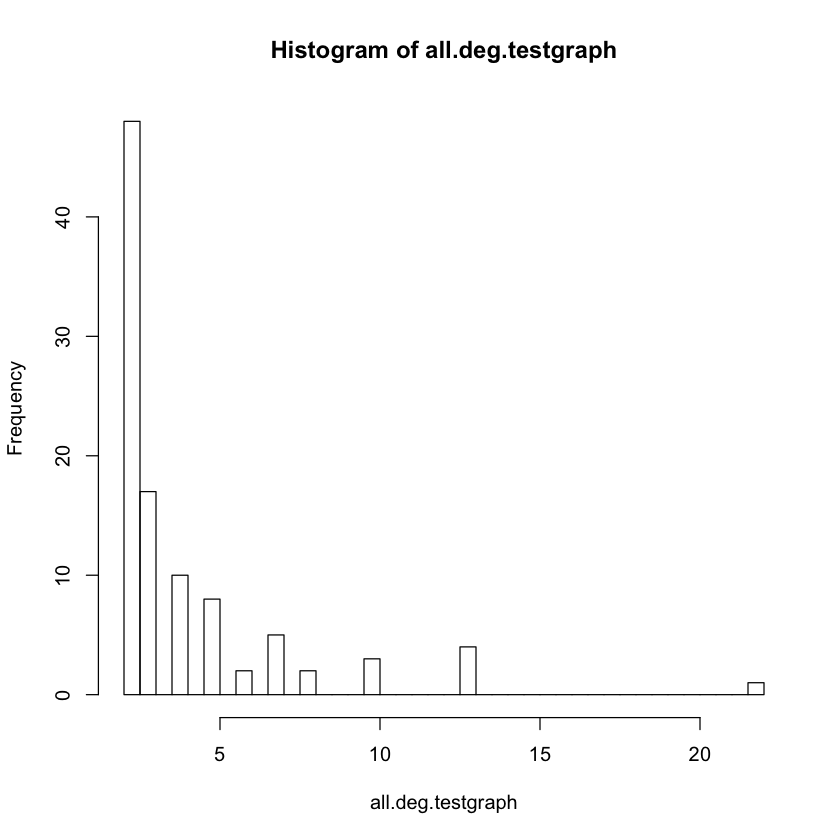

In [9]:
# Node degree distributions

# The degree of a node refers to the number of edges associated with a node.
# Degree can be measured as the edges going in ("in degree"), out ("out degree"), or both.
# The degree() function takes a graph input and gives the degree of specified nodes.
# With the argument "v=V(graph)" you tell the function to give the degree of all nodes in the graph,
# while the "mode" argument specifies in, out, or both.
 
in.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="in")
out.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="out")
all.deg.testgraph<-degree(test.graph,v=V(test.graph),mode="all")

# Count & plot the number of times nodes with degree n appear in the graph
all.deg.testgraph
table(all.deg.testgraph)
deg.counts <- table(all.deg.testgraph)
max(deg.counts)
hist(all.deg.testgraph,breaks=50) #,prob=T)
#lines(density(deg.counts)) # Use with prob=T

# Degree distribution is the cumulative frequency of nodes with a given degree
# this, like degree() can be specified as "in", "out", or "all"
deg.distr<-degree.distribution(test.graph,cumulative=T,mode="all")

[1] 0.9980398

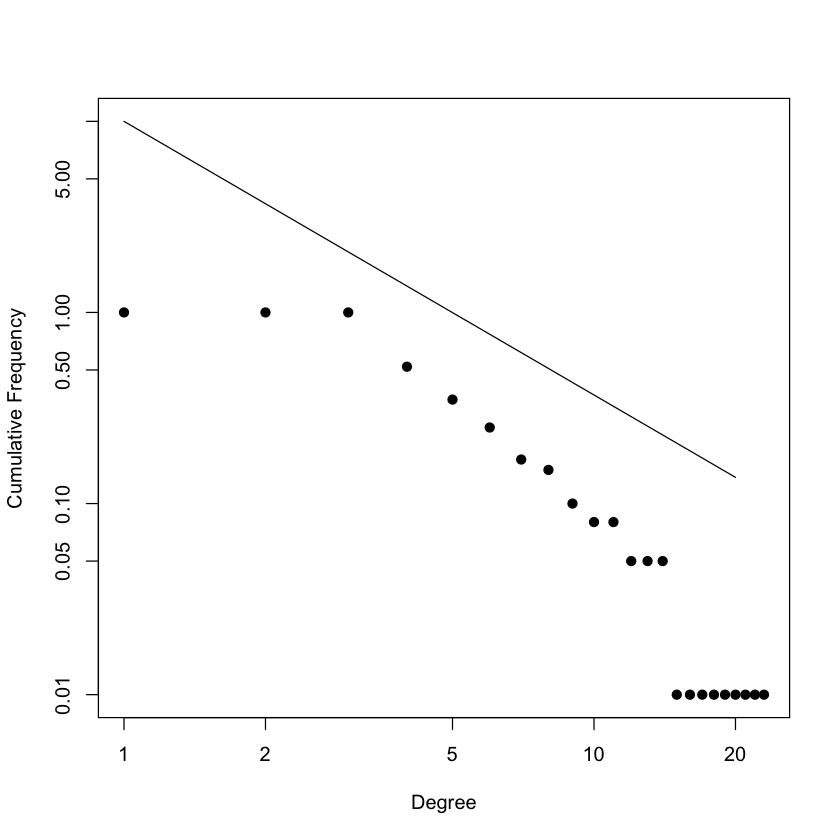

In [10]:
# Is the network scale-free?
# We can test this by comparing the node degree distribution to the 
# power-law distribution expected based on the graphs parameters

# Using the power.law.fit() function you can fit a power law to the degree distribution
power<-power.law.fit(all.deg.testgraph)
 
# The output of the power.law.fit() function gives the exponent of the power law ($alpha)
# and the log-likelihood of the parameters used to fit the power law distribution ($logLik)
# Also, it performs a Kolmogov-Smirnov test to determine whether the given degree distribution 
# could have been drawn from the fitted power law distribution.
# The function returns a test statistic ($KS.stat) and p-value ($KS.p) for that test

# Then we can plot the degree distribution
plot(deg.distr,log="xy",
ylim=c(.01,10),
bg="black",pch=21,
xlab="Degree",
ylab="Cumulative Frequency")
 
# And add a line corresponding to the expected power law distribution
lines(1:20,10*(1:20)^((-power$alpha)+1))
 
# Note: The KS test is used to determine if 2 distributions are 
# statistically different, thus the null hypothesis is that the 
# distributions are the same, and the p-value is used to reject
# the null hypothesis of same-ness

# Determine the 'goodness-of-fit' of power law to degree 
# distribution using the Kolmogorov-Smirnov (KS) test
power$KS.p
# p is >> 0.05, therefore these data are likely to follow a power law distribution
# Small p-values (less than 0.05) indicate that the test rejected the hypothesis that the original data 
# could have been drawn from the fitted power-law distribution.

# Note:
# Random graphs typically have a Poisson distribution,
# Preferential attachement random graphs follow a power law
# Many real networks follow a truncated power law degree distribution

[1] 6

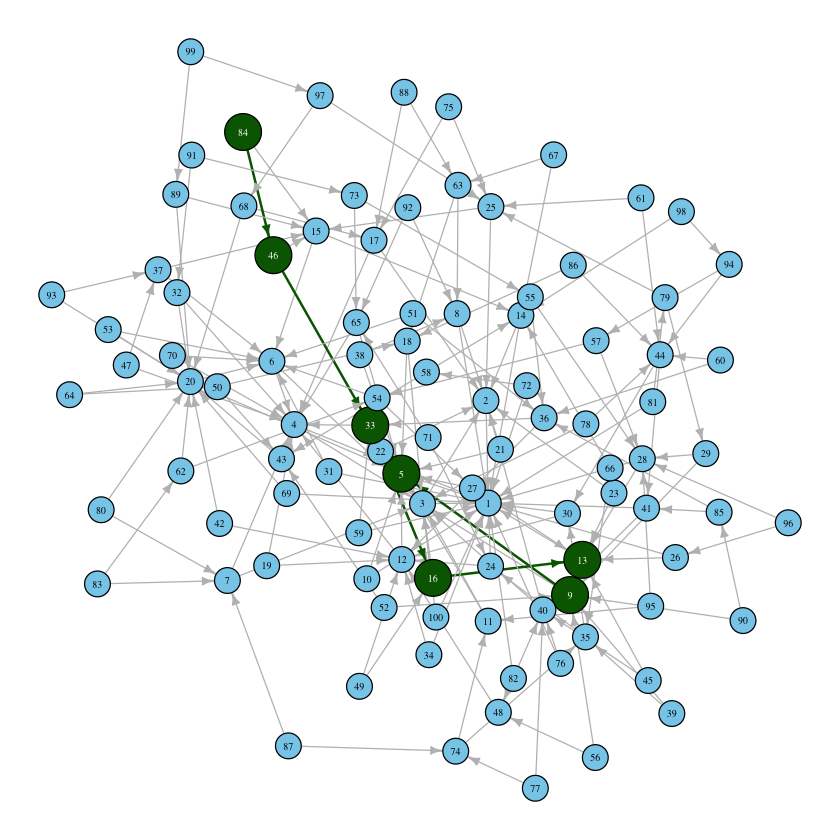

In [11]:
# Graph Diameter
# Diameter is the longest shortest path between two vertices
diameter(test.graph) # Gives the length of the diameter
nodes.diameter<-get.diameter(test.graph) # Gives the labels for each node that participate in the diameter
 
# To visualize the diameter
# First define the node and edge attributes
V(test.graph)$color<-"skyblue" # node default color
V(test.graph)$size<-7 # node default size
V(test.graph)[nodes.diameter]$color<-"darkgreen" # diameter node color
V(test.graph)[nodes.diameter]$size<-10 # diameter node size
V(test.graph)[nodes.diameter]$label.color<-"white" # diameter node label color

E(test.graph)$color<-"grey" # all non-diameter edges will be grey
E(test.graph,path=nodes.diameter)$color<-"darkgreen" # diameter edges will be dark green
E(test.graph)$width<-1
E(test.graph,path=nodes.diameter)$width<-2 # diameter edges will be wider
 
# If you do not set the attributes of all of the nodes and edges then it will
# default such that you only see what you have defined

par(mar=c(.1,.1,.1,.1))
plot.igraph(test.graph,
layout=layout.fruchterman.reingold,
vertex.label.cex=.5,
edge.arrow.size=.5)

In [12]:
# Properties informative about "small-worldness" of networks

# Clustering coefficient, betweenness, and closeness
# all describe the small world properties of the network.
# A network with small world properties is one in which
# it takes a relatively short path to get from one node to the next
# (e.g., six degrees of separation)

# Clustering coefficient is the proportion of
# a nodes neighbors that can be reached by other neighbors
# in igraph this property is apparently called "transitivity"
 
transitivity(test.graph)
# gives the clustering coefficient of the whole network
 
head(transitivity(test.graph,type="local"))
# gives the clustering coefficient of each node
 
# Betweenness is the number of shortest paths between two nodes that go through each node of interest
graph.betweenness<-betweenness(test.graph,v=V(test.graph))
head(graph.betweenness)

# The edge betweenness score of an edge measures the number of shortest paths through it
graph.edge.betweenness<-edge.betweenness(test.graph,e=E(test.graph))
head(graph.edge.betweenness)
 
# Closeness refers to how connected a node is to its neighbors
graph.closeness<-closeness(test.graph,vids=V(test.graph))
head(graph.closeness)



[1] 0.05415162

[1] 0.03896104 0.08888889 0.12820513 0.06410256 0.06410256 0.08888889

[1]  0.00000  7.75000 68.25000 46.36667 37.93333 46.16667

[1]  8.75000 11.50000 58.75000 17.25000 32.11667 25.26667

[1] 0.0001010101 0.0001020304 0.0001030715 0.0001041233 0.0001041233
[6] 0.0001051967

[1] 1 2 4 5 6 3

[1] 1 4 5 2 6 3

[1] 1 4 5 6 2 3

[1] 1 2 4 5 6 3

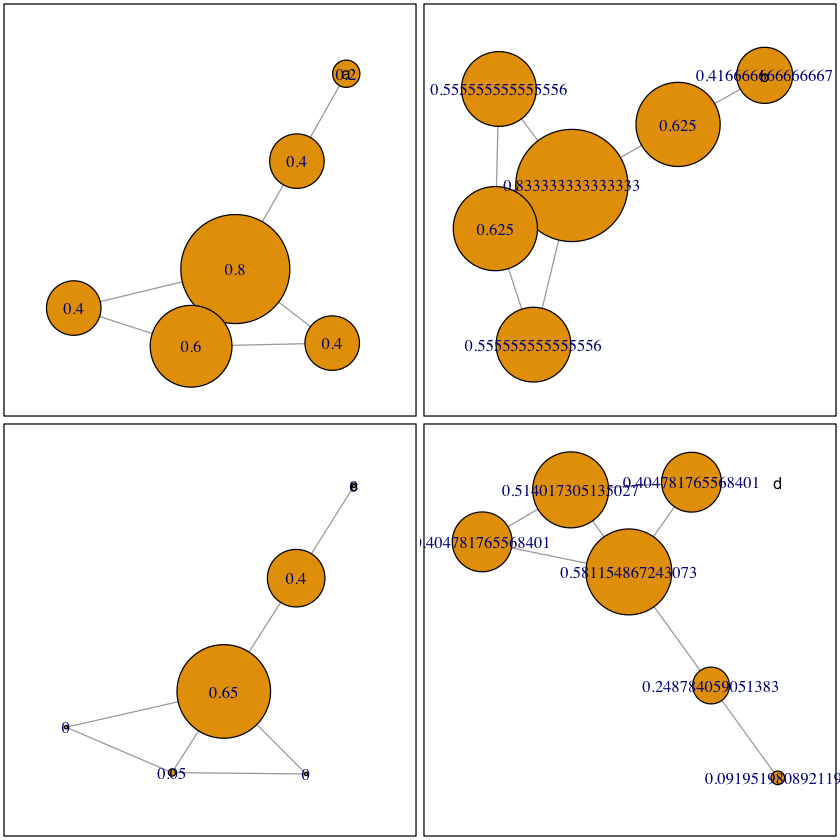

In [13]:
# Compare graph properties for similar graphs 
#g <- graph.formula(A-B,B-C,C-D,D-E)
#g <- graph.formula(A-B,A-C,A-D,A-E,A-F)
g <- graph.formula(A-B,B-C,C-D,C-E,C-F,D-F,E-F)

# Uncomment to get a simple list of values for each node
# Degree
#degree(g,normalized=T)
# Closeness (inverse of average dist)
#closeness(g,normalized=T)
# Betweenness
#betweenness(g,normalized=T)
# Local cluster coefficient - Doesn't make sense for very simple examples
#transitivity(g, type="local")
# Eigenvector centrality
#evcent(g,scale=F)$vector

# Now rank them
order(degree(g))
order(closeness(g))
#order(transitivity(g,type="local"))
order(betweenness(g))
order(evcent(g,scale=T)$vector)

txt<-c("a","b","c","d")    # vector for labeling the graphs
par(mfrow=c(2,2),mar=c(.2,.2,.2,.2))
plot.igraph(g,vertex.size=100*degree(g,normalized=T),vertex.label=degree(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[1]) 
plot.igraph(g,vertex.size=100*closeness(g,normalized=T),vertex.label=closeness(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[2]) 
plot.igraph(g,vertex.size=100*betweenness(g,normalized=T),vertex.label=betweenness(g,normalized=T),layout=layout.auto,frame=T)
text(1,1,txt[3]) 
plot.igraph(g,vertex.size=100*evcent(g,scale=F)$vector,vertex.label=evcent(g,scale=F)$vector,layout=layout.auto,frame=T)
text(1,1,txt[4]) 

In [14]:
?evcent

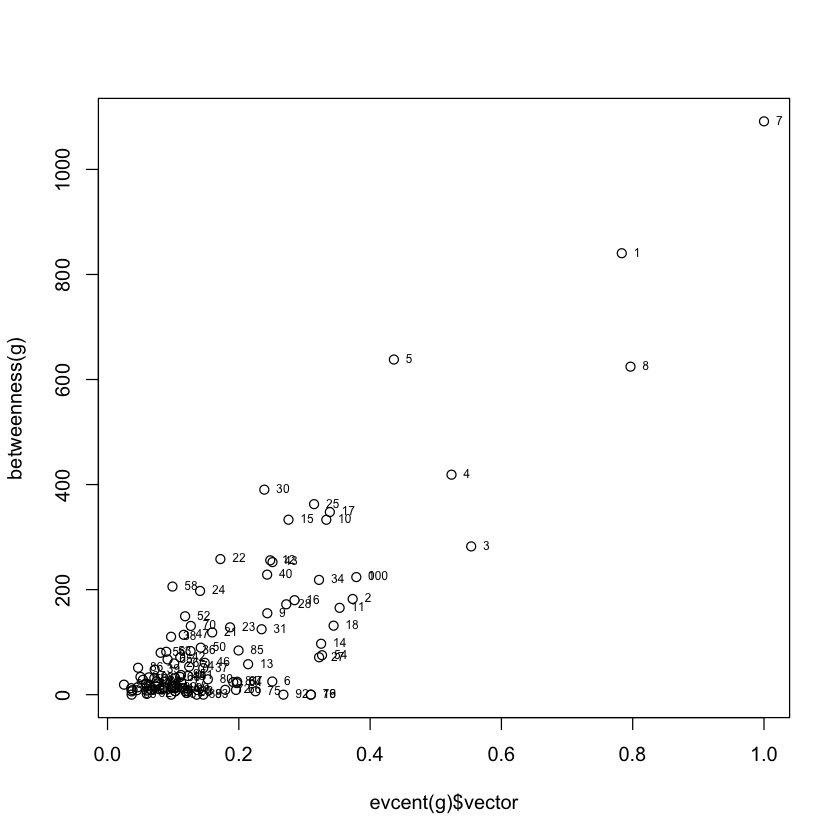

In [15]:
# Centrality measures applied:
# Nodes with different roles in regulating 'information flow'

# A study found that people with low Eigenvector centrality but high Betweenness centrality
# in social networks are important 'gate keepers', while people with high Eigenvector centrality but low Betweenness 
# centrality have direct contact to important persons. So lets plot Eigenvector centrality against Betweenness 
# centrality to identify individuals with these qualities.

# Create a graph by taking the union of two different graphs
g1 <- barabasi.game(100, directed=F)
g2 <- barabasi.game(100, directed=F)
g <- g1 %u% g2
lay <- layout.fruchterman.reingold(g)
# Plot the eigevector and betweenness centrality
plot(evcent(g)$vector, betweenness(g))
text(evcent(g)$vector, betweenness(g), 0:100, cex=0.6, pos=4)

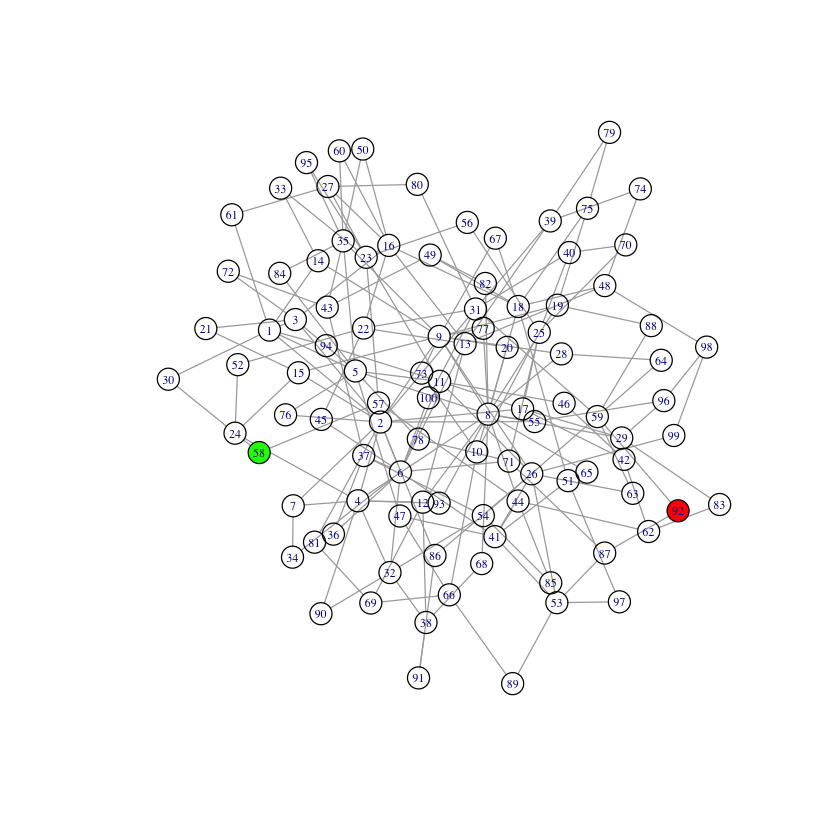

In [16]:
V(g)[92]$color <- 'red'
V(g)[58]$color <- 'green'
plot(g, layout=lay, vertex.size=8, 
vertex.label.cex=0.6)

[[1]]
  [1] 7 7 7 1 7 1 1 3 7 7 2 7 7 4 9 7 5 6 7 1 7 7 7 3 5 2 2 2 2 7 1 8 7 7 4 6 1
 [38] 3 4 7 6 7 1 6 7 9 1 7 7 1 6 1 1 2 6 7 2 1 7 6 5 1 3 1 3 4 3 5 1 1 3 1 8 4
 [75] 5 7 4 6 2 1 2 7 1 9 6 6 4 3 5 6 8 3 1 2 2 2 5 2 5 7


[1] "merges"     "modularity" "membership" "vcount"     "algorithm"

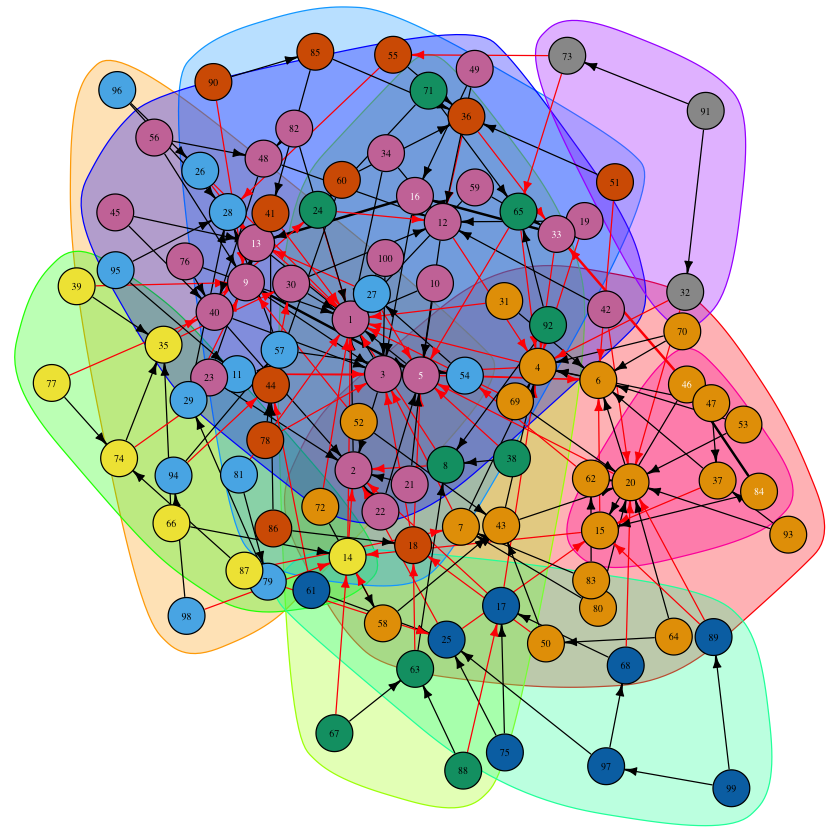

In [17]:
# Modularity

# Use a community detection algorithm to determine the most densely 
# connected nodes in a graph.
 
g.community<-walktrap.community(test.graph)
 
# This algorithm uses random walks to find the most densely connected subgraphs.
 
members<-membership(g.community)
# The members() function picks out the membership vector 
# (list of nodes in the most densely connected subgraph) from 
# the communtiy object (e.g., walktrap community).
list(members)

par(mar=c(.1,.1,.1,.1))    # sets the edges of the plotting area
names(g.community)
plot(g.community, test.graph, layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5)

[1] "merges"     "modularity" "membership" "vcount"     "algorithm"

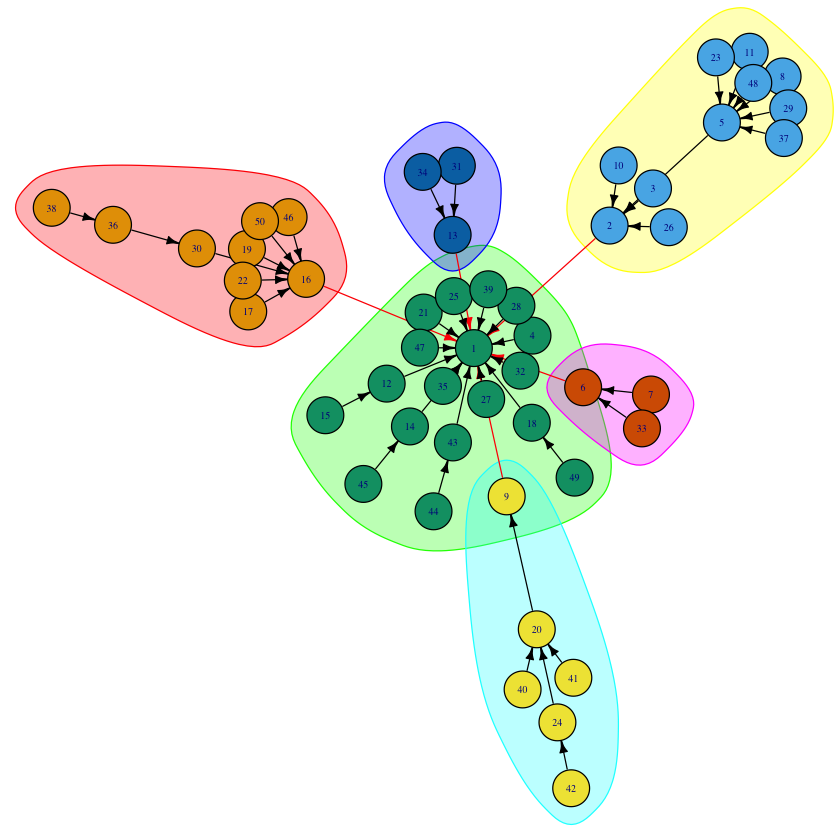

In [18]:
# Repeat with a simpler graph
test.graph.1 <- barabasi.game(n=50,power=1)
g.community<-walktrap.community(test.graph.1) 
members<-membership(g.community)

par(mar=c(.1,.1,.1,.1))    # sets the edges of the plotting area
names(g.community)
plot(g.community, test.graph.1, layout=layout.fruchterman.reingold,
vertex.size=10,
vertex.label.cex=.5,
edge.arrow.size=.5)